Read in as a grayscale so there is no need for RGB value for each pixel, we only need a 28x28 array.

(28, 28)


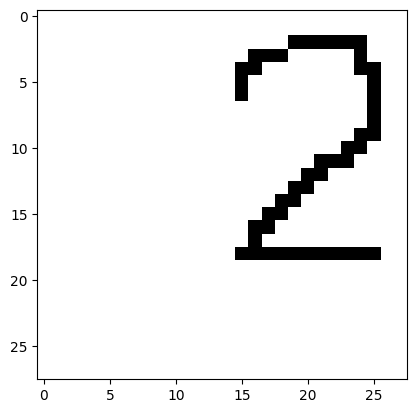

In [90]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

im = cv2.imread("digit2.png" , cv2.IMREAD_GRAYSCALE)
print(im.shape)
plt.imshow(im, cmap=plt.cm.binary )
plt.show()


The axes are shown in an unusual way. If we try to "fix" it we can encounter a mirroring effect. For reference I will mark the 1,1 point on the image.


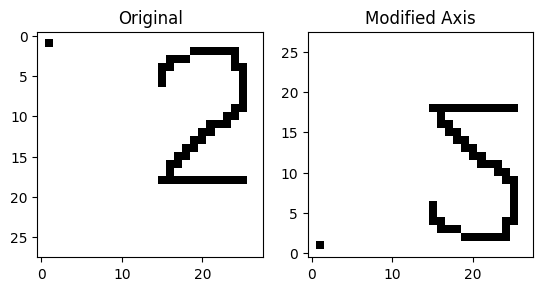

In [91]:
test_im = np.copy(im)
test_im[1,1] = 255

figure1, axarr = plt.subplots(1,2)

axarr[0].imshow(test_im, cmap=plt.cm.binary)
axarr[0].set_title("Original")
axarr[1].imshow(test_im, cmap=plt.cm.binary, origin='lower')
axarr[1].set_title("Modified Axis")


plt.show()


Find every X and Y index where a dark pixel can be found. The average will be the current center of mass for the image. The real center would be 14,14 for the 28x28 image. The difference between the image center and the whole image center is the shift we need.

All indices where a black pixel can be found on the X axis: [ 2  2  2  2  2  2  3  3  3  3  4  4  4  4  5  5  6  6  7  8  9  9 10 10
 11 11 11 12 12 13 13 14 14 15 15 16 16 17 18 18 18 18 18 18 18 18 18 18
 18] 

Center of the number on the image: 10.26530612244898, 20.346938775510203

The shift needed to center the number on the image: 3.7346938775510203 , -6.346938775510203 



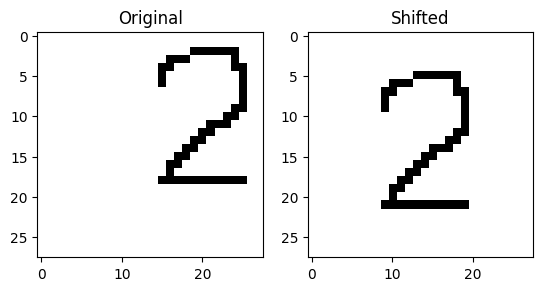

In [92]:
mass_x, mass_y = np.where(im >= 255)

print(f"All indices where a black pixel can be found on the X axis: {mass_x} \n")

cent_x = np.average(mass_x)
cent_y = np.average(mass_y)

print(f"Center of the number on the image: {cent_x}, {cent_y}\n")

diff_x = 14 - cent_x 
diff_y = 14 - cent_y

print(f"The shift needed to center the number on the image: {diff_x} , {diff_y} \n")

#Roll the whole matrix around an axis: Roll (matrix , how much, which axis)

rolled =  np.roll(im , int(diff_x) , 0 )
rolled =  np.roll(rolled , int(diff_y) , 1 )


figure2, axarr = plt.subplots(1,2)

axarr[0].imshow(im, cmap=plt.cm.binary)
axarr[0].set_title("Original")
axarr[1].imshow(rolled, cmap=plt.cm.binary)
axarr[1].set_title("Shifted")

plt.show()